In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV


In [2]:
dataset=pd.read_csv("D:/ammar college/Level 3/semester2/Advanced ML/housing.csv")

In [3]:
dataset.shape

(20640, 10)

In [5]:
dataset.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [8]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


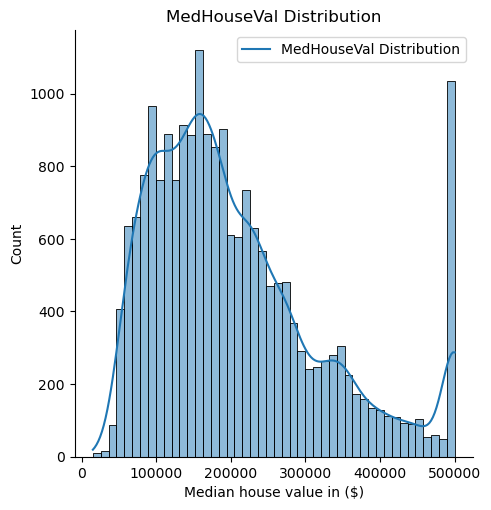

In [10]:

#CREATING A DISTRIBUTION PLOT FOR TARGET FEATURE

sns.displot(dataset['median_house_value'], kde = True)

plt.title('MedHouseVal Distribution')
plt.xlabel("Median house value in ($)")
plt.legend(['MedHouseVal Distribution'], loc = 'best')
plt.show()

In [21]:
dataset.isna().any()

longitude                   False
latitude                    False
housing_median_age          False
total_rooms                 False
total_bedrooms               True
population                  False
households                  False
median_income               False
median_house_value          False
ocean_proximity             False
bedrooms_per_room            True
population_per_household    False
dtype: bool

In [3]:
median_value = dataset['total_bedrooms'].median()
dataset['total_bedrooms'].fillna(median_value, inplace=True)

# Visualize the location of the houses

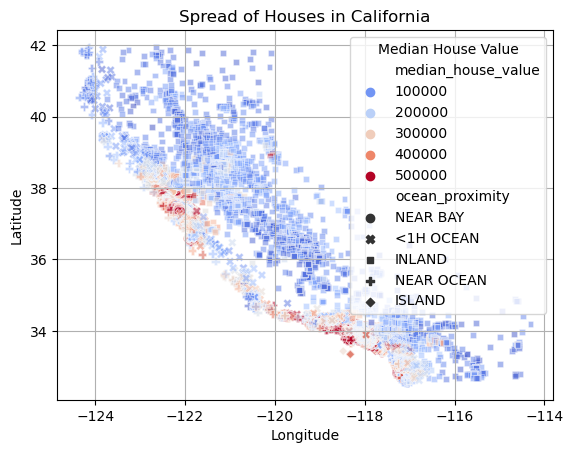

In [13]:
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value',style='ocean_proximity', data=dataset, palette='coolwarm', alpha=0.5)
plt.title('Spread of Houses in California')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend(title='Median House Value')

<Axes: >

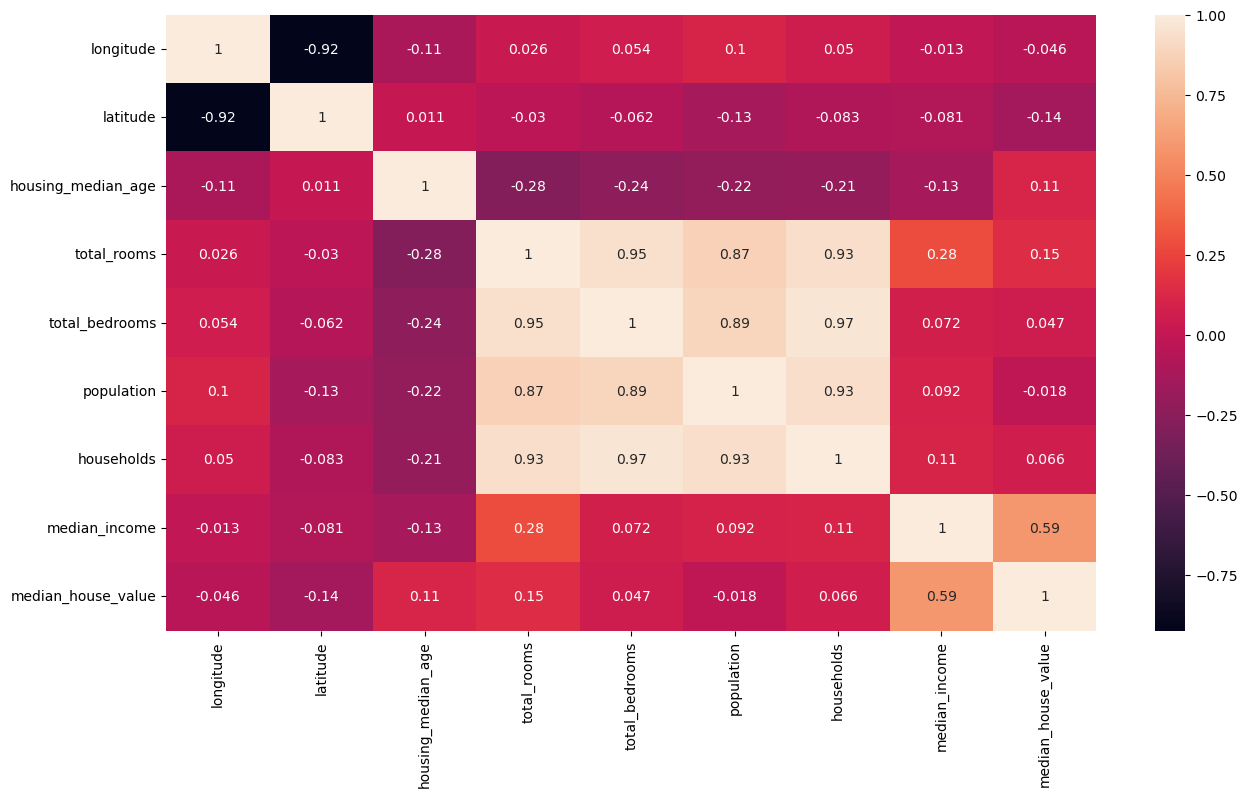

In [49]:
plt.figure(figsize=(15,8))
sns.heatmap(dataset.drop(columns="ocean_proximity").corr(), annot = True)

In [4]:
# Feature Selection (example using SelectKBest)
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from joblib import load

label_encoder = LabelEncoder()



log_columns=["total_rooms","total_bedrooms","population","households","median_income"]


# Dealing with left skewed featuers


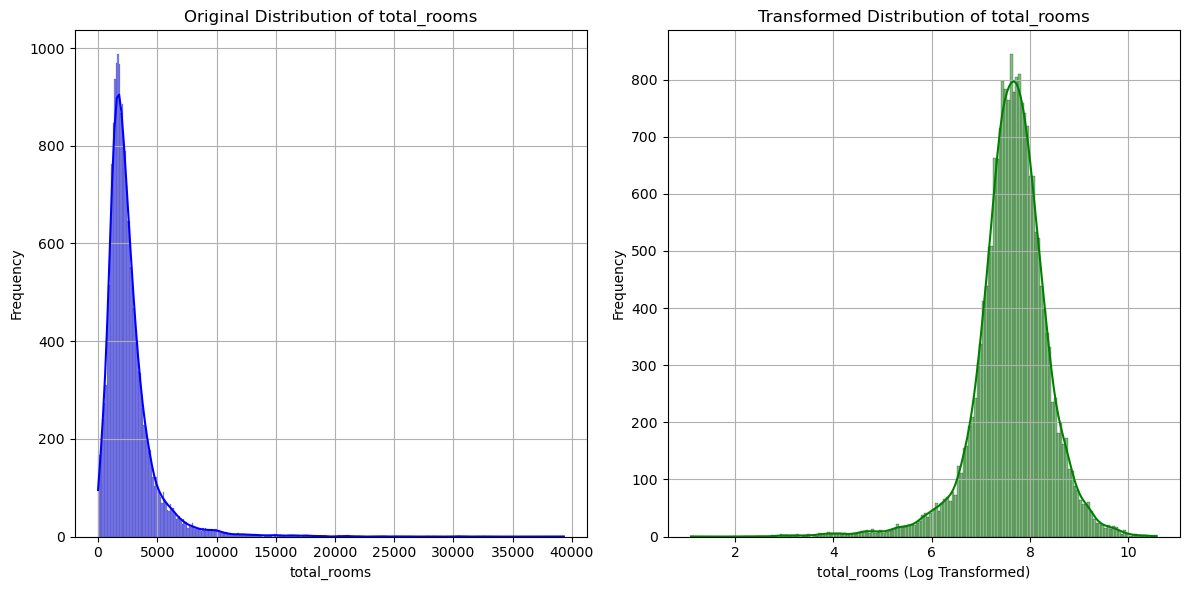

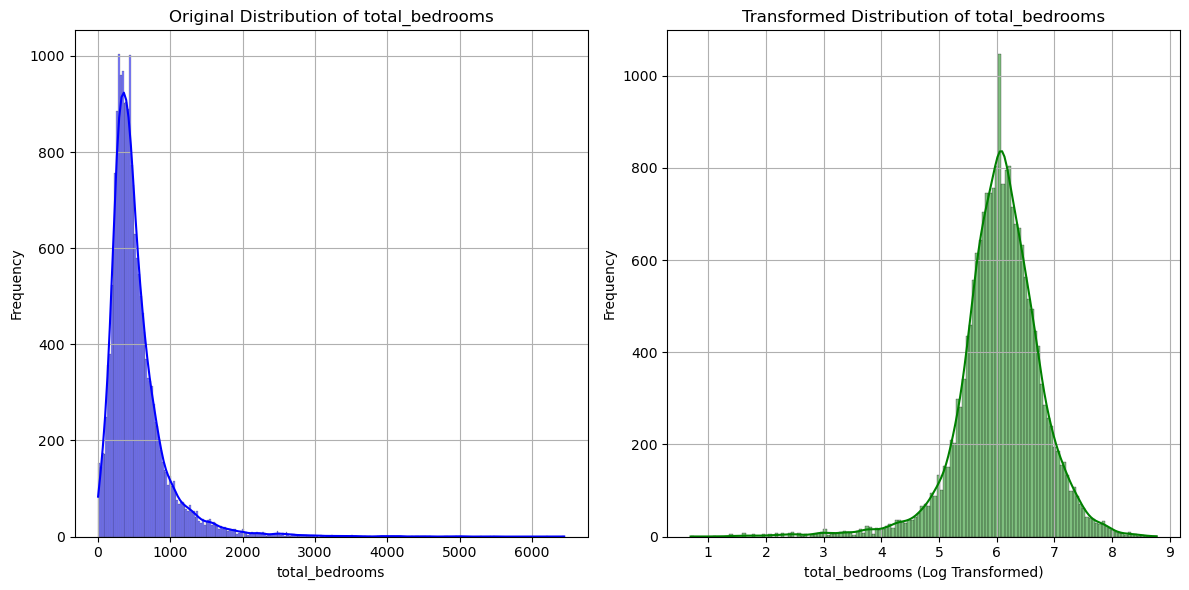

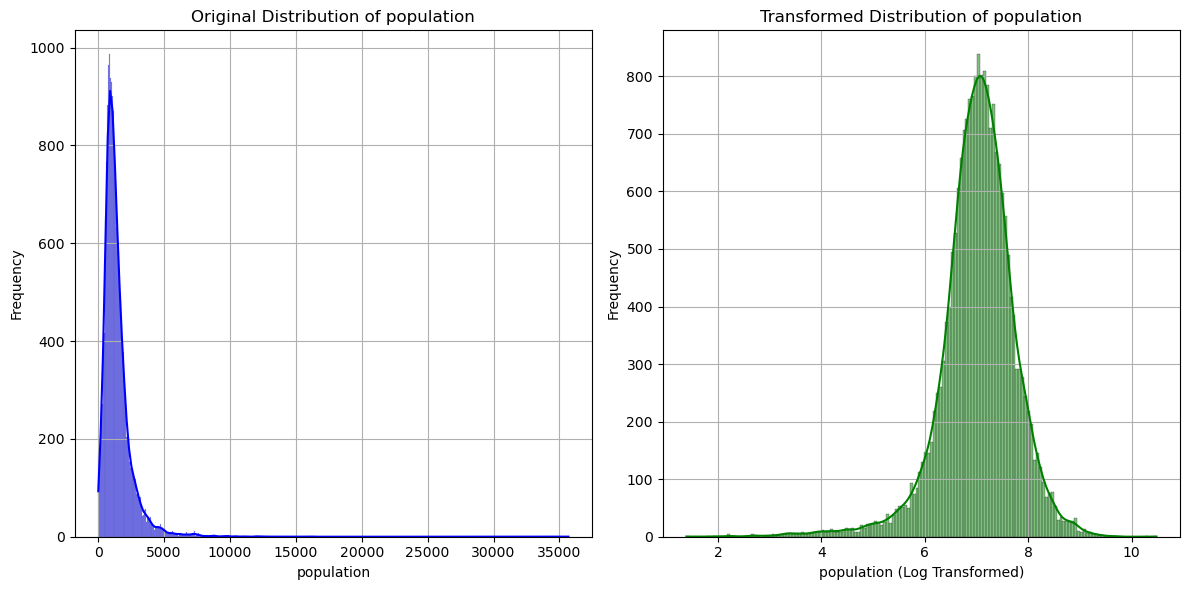

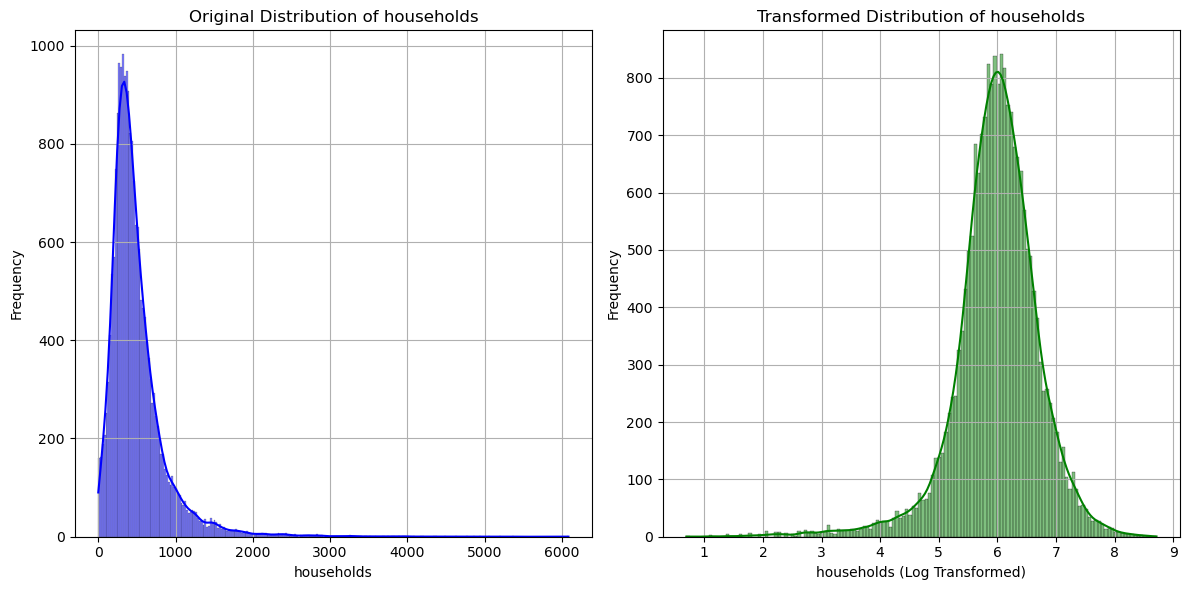

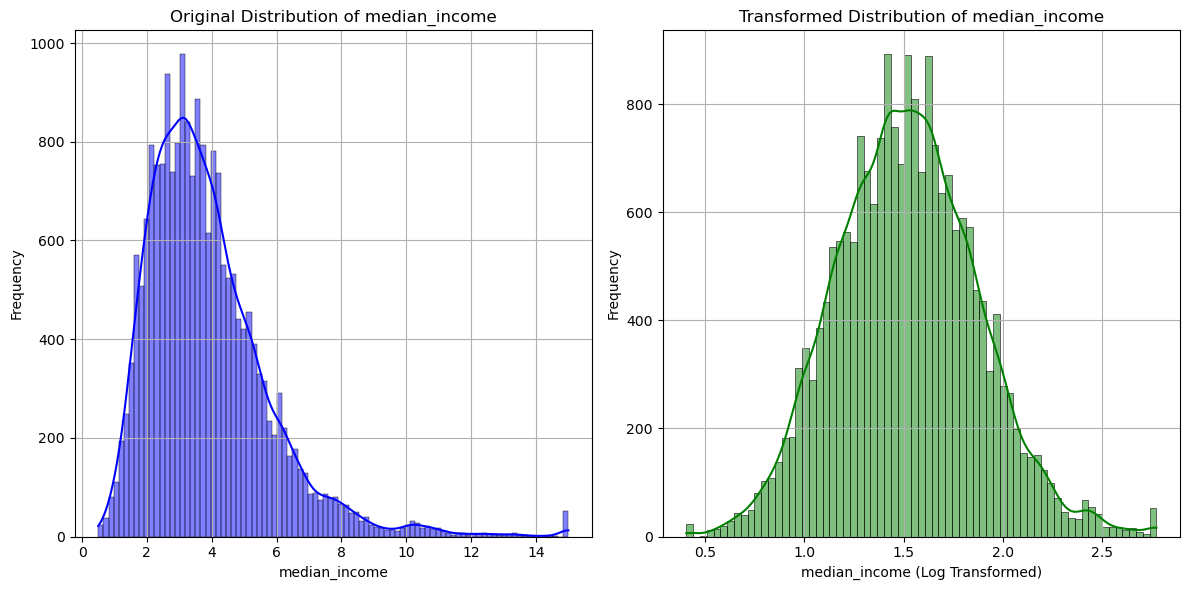

In [57]:
for column in log_columns:
    plt.figure(figsize=(12, 6))
    
    # Plot original data
    plt.subplot(1, 2, 1)
    sns.histplot(dataset[column], kde=True, color='blue')
    plt.title(f'Original Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    
    # Plot transformed data
    plt.subplot(1, 2, 2)
    sns.histplot(np.log1p(dataset[column]), kde=True, color='green')
    plt.title(f'Transformed Distribution of {column}')
    plt.xlabel(column + ' (Log Transformed)')
    plt.ylabel('Frequency')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

In [5]:
for column in log_columns:
    dataset[column]=np.log1p(dataset[column])
label_encoder = LabelEncoder()
dataset['ocean_proximity'] = label_encoder.fit_transform(dataset['ocean_proximity'])


y_target = dataset['median_house_value']
X_features = dataset.drop(['median_house_value'], axis = 1)
median_value = X_features['total_bedrooms'].median()
X_features['total_bedrooms'].fillna(median_value, inplace=True)

y_target_log = np.log1p(y_target)
# TRAIN TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size = 0.2, random_state = 1)

#STANDARDIZE THE DATASET


#SCALING THE TRAIN DATA - FIT AND TRANSFORM
scaler = StandardScaler()


X_train = scaler.fit_transform(X_train)



X_test = scaler.transform(X_test)

print("training size: ",X_train.shape)
print("test size: ",X_test.shape)

training size:  (16512, 9)
test size:  (4128, 9)


# Train the SVR Model


In [6]:
# svr_model = SVR()
svr_params = {
    'kernel': 'rbf',       # You can choose from 'linear', 'poly', 'rbf', 'sigmoid'
    'C': 30,              # Regularization parameter
    'epsilon': 0.2,        # Epsilon parameter in the epsilon-SVR model
    'gamma': 'scale'      # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'

}

# Create SVR model with specified parameters
svr_model = SVR(**svr_params)


# #FIT THE MODEL USING THE COMPLETE TRAINING DATA FOR BETTER PERFORMANCE
svr_model.fit(X_train, y_train)

#EVALUATION SCORE (R SQUARED) ON TRAIN DATA - HOW WELL OUR MODEL PERFORMS ON TRAINING DATA
vvv=svr_model.score(X_train, y_train)
print("train score", vvv)

#EVALUATION SCORE ON TEST DATA TO SEE HOW WELL OUR MODEL GENERALIZE TO NEW DATA
fff=svr_model.score(X_test, y_test)
print("test score", fff)
y_pred=svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("SVR Model accuracy: ", r2)

train score 0.8568588799943107
test score 0.7942489906766661
Mean Squared Error: 0.06767258800061768
SVR Model accuracy:  0.7942489906766661


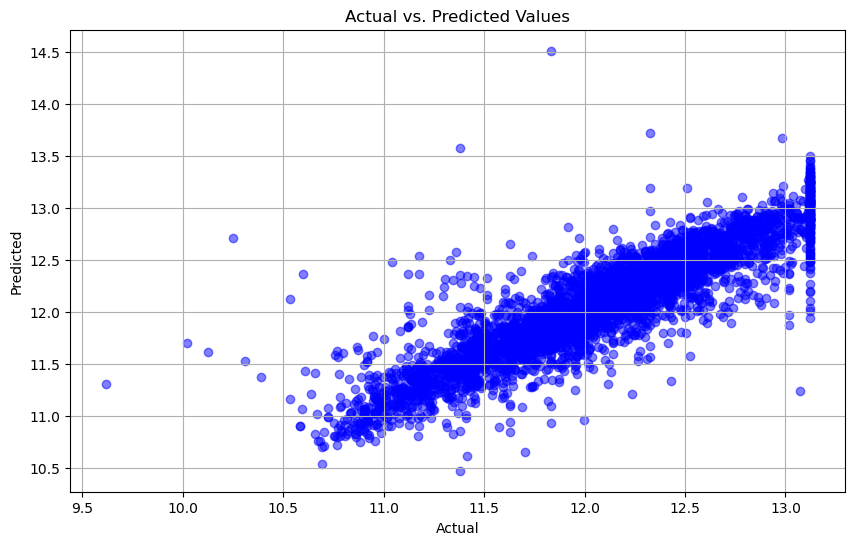

In [44]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

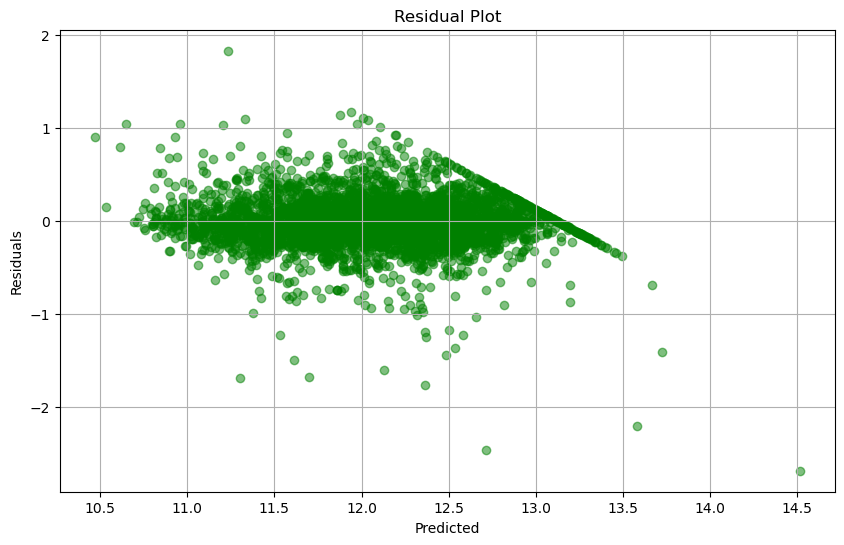

In [45]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

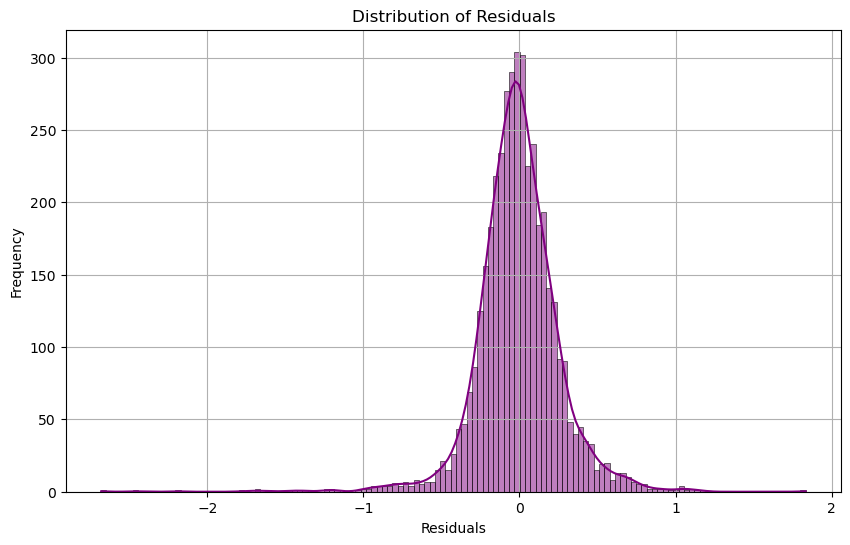

In [46]:
# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()